In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data
import yfinance as yf

In [2]:
start = '2010-1-1'
end = '2019-12-31'

df = yf.download('TSLA', start, end)
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [3]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-23,27.452000,28.134001,27.333332,27.948000,27.948000,199794000
2019-12-24,27.890667,28.364668,27.512667,28.350000,28.350000,120820500
2019-12-26,28.527332,28.898666,28.423332,28.729334,28.729334,159508500
2019-12-27,29.000000,29.020666,28.407333,28.691999,28.691999,149185500
2019-12-30,28.586000,28.600000,27.284000,27.646667,27.646667,188796000


In [4]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [5]:
df = df.drop(['Date', 'Adj Close'], axis =1)
df.head()

,Open,High,Low,Close,Volume
0,1.266667,1.666667,1.169333,1.592667,281494500
1,1.719333,2.028000,1.553333,1.588667,257806500
2,1.666667,1.728000,1.351333,1.464000,123282000
3,1.533333,1.540000,1.247333,1.280000,77097000
4,1.333333,1.333333,1.055333,1.074000,103003500


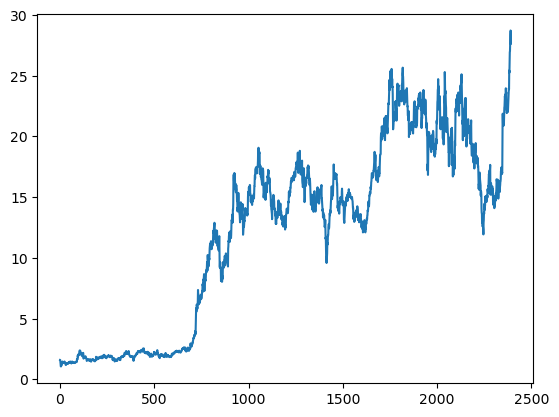

In [6]:
plt.plot(df.Close)

In [7]:
df

,Open,High,Low,Close,Volume
0,1.266667,1.666667,1.169333,1.592667,281494500
1,1.719333,2.028000,1.553333,1.588667,257806500
2,1.666667,1.728000,1.351333,1.464000,123282000
3,1.533333,1.540000,1.247333,1.280000,77097000
4,1.333333,1.333333,1.055333,1.074000,103003500
...,...,...,...,...,...
2388,27.452000,28.134001,27.333332,27.948000,199794000
2389,27.890667,28.364668,27.512667,28.350000,120820500
2390,28.527332,28.898666,28.423332,28.729334,159508500
2391,29.000000,29.020666,28.407333,28.691999,149185500


In [8]:
ma100 = df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2388    18.778527
2389    18.905800
2390    19.040880
2391    19.173967
2392    19.294820
Name: Close, Length: 2393, dtype: float64

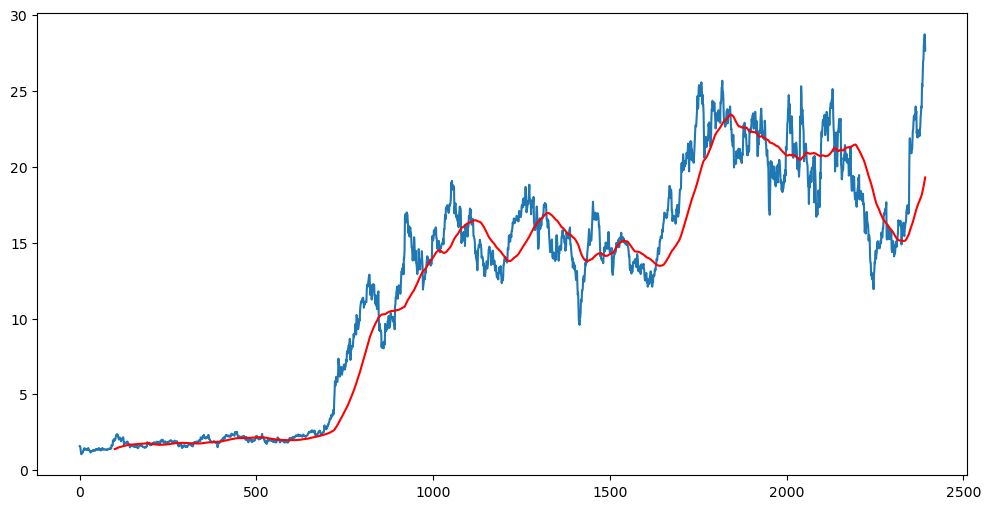

In [9]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [10]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2388    17.430070
2389    17.477367
2390    17.524693
2391    17.571500
2392    17.617923
Name: Close, Length: 2393, dtype: float64

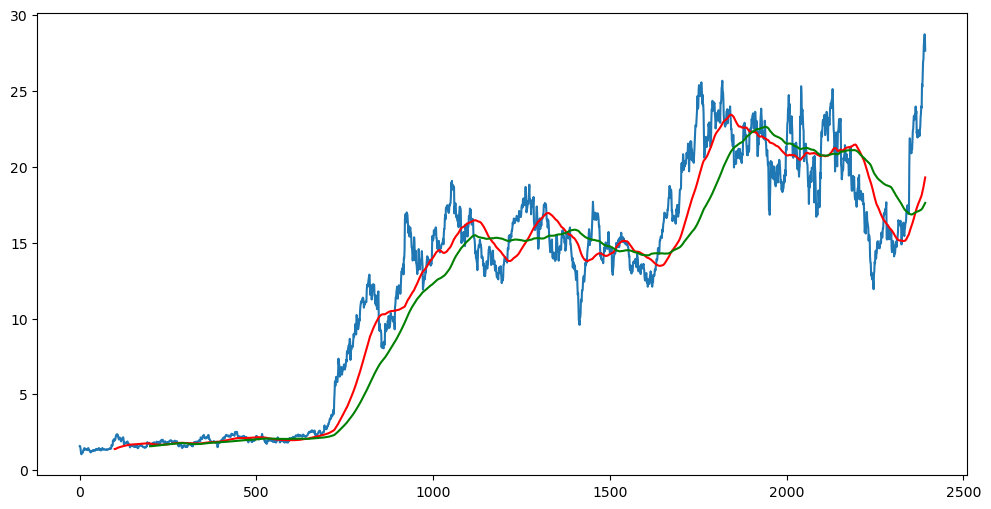

In [11]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [12]:
df.shape

(2393, 5)

In [13]:
# Splitting data into Training and Testing
Train_data = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
Test_data = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(Train_data.shape)
print(Test_data.shape)

(1675, 1)
(718, 1)


In [14]:
Train_data.head()

,Close
0,1.592667
1,1.588667
2,1.464000
3,1.280000
4,1.074000


In [15]:
Test_data.head()

,Close
1675,17.066000
1676,17.133333
1677,16.415333
1678,16.666000
1679,16.667999


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [17]:
Train_data_array = scaler.fit_transform(Train_data)
Train_data_array

array([[0.02993639],
       [0.02971437],
       [0.02279457],
       ...,
       [0.94889733],
       [0.96799146],
       [0.95363383]])

In [18]:
Train_data_array.shape

(1675, 1)

In [19]:
X_train = []
y_train= []

for i in range(100, Train_data_array.shape[0] ):
    X_train.append(Train_data_array[i-100: i])
    y_train.append(Train_data_array[1,0])
    
X_train,y_train = np.array(X_train), np.array(y_train)

In [20]:
X_train.shape

(1575, 100, 1)

In [21]:
#Machine learning model

In [22]:
from keras.layers import Dense, Dropout,LSTM
from keras.models import Sequential

In [23]:
model = Sequential()
model.add(LSTM(units=50, activation = 'relu', return_sequences=True,
              input_shape = (X_train.shape[1],1) ))
model.add(Dropout(0.2))



model.add(LSTM(units=60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))



model.add(LSTM(units=80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units=120, activation = 'relu', return_sequences=True))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 100, 120)          9

In [25]:
# model.compile(optimizer='adam', loss='mean_squared_error')
# model.fit(X_train,y_train,epochs = 50)

In [26]:
model.save('keras_model.h5')

C:\Users\HP\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [27]:
Test_data.head()

,Close
1675,17.066000
1676,17.133333
1677,16.415333
1678,16.666000
1679,16.667999


In [28]:
past_100_days = Train_data.tail(100)

In [29]:
final_df  = past_100_days.append(Test_data,ignore_index=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_20128\3332290871.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df  = past_100_days.append(Test_data,ignore_index=True)


In [30]:
final_df.head()

,Close
0,13.380000
1,13.602000
2,14.246667
3,14.094000
4,13.897333


In [31]:
input_data = scaler.transform(final_df)
input_data

array([[0.68420669],
       [0.69652908],
       [0.73231209],
       [0.72383812],
       [0.71292189],
       [0.68531679],
       [0.66907198],
       [0.68513178],
       [0.68198644],
       [0.68720402],
       [0.68250446],
       [0.66870196],
       [0.6592659 ],
       [0.67828598],
       [0.6947899 ],
       [0.67828598],
       [0.68194939],
       [0.69182952],
       [0.69027535],
       [0.68990534],
       [0.69645507],
       [0.68150537],
       [0.67321646],
       [0.64753554],
       [0.63728544],
       [0.6350652 ],
       [0.6466845 ],
       [0.65649058],
       [0.66289231],
       [0.64483427],
       [0.62740531],
       [0.63928368],
       [0.61297374],
       [0.62155866],
       [0.62215073],
       [0.6396537 ],
       [0.62618421],
       [0.62433398],
       [0.64894175],
       [0.65623157],
       [0.66921998],
       [0.6672588 ],
       [0.64302104],
       [0.64239202],
       [0.61456485],
       [0.61304769],
       [0.63277089],
       [0.629

In [32]:
input_data.shape

(818, 1)

In [33]:
X_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    X_test.append(input_data[i-100: i])
    y_test.append(input_data[i,0])

In [34]:
X_test, y_test = np.array(X_test), np.array(y_test)
print(X_test.shape)
print(y_test.shape)

(718, 100, 1)
(718,)


In [35]:
y_test.reshape(-1,1)

array([[0.88880261],
       [0.89254002],
       [0.85268653],
       [0.86660014],
       [0.86671109],
       [0.86841337],
       [0.87244679],
       [0.87111464],
       [0.86141951],
       [0.85505484],
       [0.84776507],
       [0.84328752],
       [0.85246452],
       [0.89624048],
       [0.88784057],
       [0.91122708],
       [0.90919184],
       [0.91074601],
       [0.8691534 ],
       [0.88517625],
       [0.88432506],
       [0.91533462],
       [0.94145955],
       [0.96821357],
       [0.96795451],
       [0.96995269],
       [0.97135886],
       [1.04618122],
       [1.06534946],
       [1.03315585],
       [1.04684735],
       [1.06105686],
       [1.097506  ],
       [1.08388851],
       [1.03996455],
       [1.0664595 ],
       [1.05698649],
       [1.05258295],
       [1.07208415],
       [1.06094591],
       [1.07238016],
       [1.0813722 ],
       [1.10268653],
       [1.08929104],
       [1.0835924 ],
       [1.10372267],
       [1.13613829],
       [1.121

In [36]:
# Making Prediction

y_predicted = model.predict(X_test)

23/23 [==============================] - 3s 67ms/step


In [37]:
y_predicted.shape

(718, 100, 1)

In [38]:
y_predicted = np.random.random(size=(755, 1, 1))
y_predicted.shape

y_predicted = y_predicted.reshape(-1,)
y_predicted.shape

(755,)

In [39]:
y_test.shape

(718,)

In [40]:
y_predicted

array([2.35445293e-01, 4.81419428e-01, 1.93621283e-02, 9.64870814e-01,
       7.21640428e-01, 1.18167586e-01, 9.88028052e-01, 5.35065095e-02,
       5.60303868e-01, 4.52689750e-01, 6.28269571e-01, 5.41338287e-01,
       7.20208217e-01, 6.73210300e-01, 7.37618185e-01, 8.32843152e-01,
       5.02725260e-02, 1.45730485e-01, 9.19527245e-01, 8.88153431e-01,
       8.77089545e-01, 1.26611573e-02, 4.26268065e-01, 4.82852012e-01,
       5.47784566e-01, 5.07174470e-01, 6.70593328e-01, 3.71477701e-01,
       5.59303873e-01, 5.90157139e-01, 6.63220392e-01, 6.70718615e-01,
       7.78320665e-02, 8.11988187e-01, 7.35896200e-01, 6.28575683e-01,
       9.20137976e-01, 5.42570236e-01, 2.46902949e-01, 8.19785836e-01,
       8.53679467e-01, 2.45303539e-01, 8.09958175e-02, 6.31346671e-01,
       7.11269787e-01, 4.24422022e-01, 1.75175594e-01, 3.32468616e-01,
       4.71935218e-01, 4.89985150e-01, 9.35154579e-01, 3.18143953e-01,
       4.22322350e-01, 5.72945970e-01, 2.30937171e-01, 1.25861113e-01,
      

In [41]:
scaler.scale_

array([0.05550622])

In [42]:
scale_factor =1/0.02123255
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

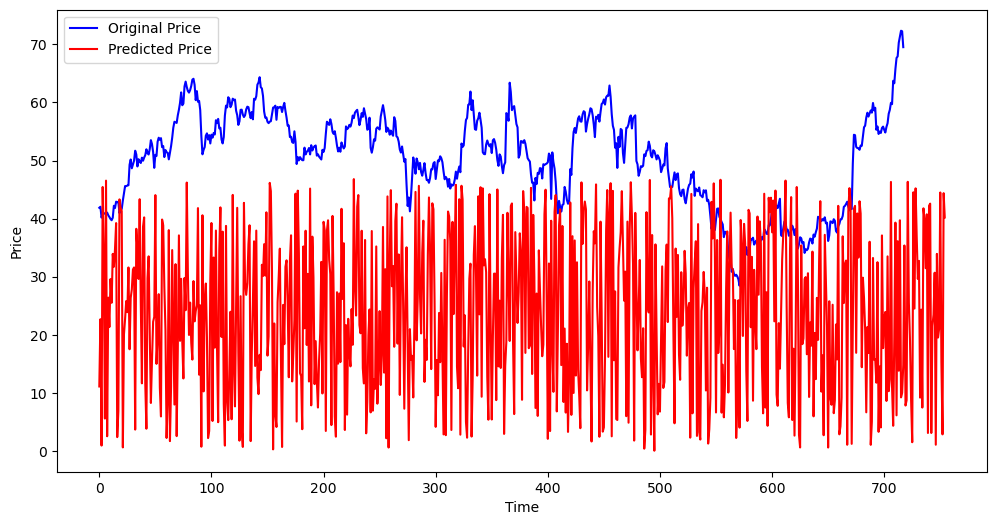

In [43]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b' , label = 'Original Price')
plt.plot(y_predicted , 'r' , label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()